<a href="https://colab.research.google.com/github/aabarzu/Coding-Dojo/blob/main/EjercicioRedesNeuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical


In [3]:
def CargaDatos(filename):
  
  extension = filename[filename.find('.')+1:]
  path = "/content/drive/MyDrive/CodingDojo/DataScience/PandasForDataManipulation/Datos/"

  filename = path + filename
  if extension.lower() == 'csv':
      df = pd.read_csv(filename)   # csv
  
  if extension.lower() == 'xlsx':
      df = pd.read_excel(filename) # Excel

  return df


In [4]:
filename = 'train.csv'    

df = CargaDatos(filename)

In [5]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
label,42000.0,4.456643,2.887730,0.0,2.0,4.0,7.0,9.0
pixel0,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel1,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel2,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel3,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
pixel779,42000.0,0.002857,0.414264,0.0,0.0,0.0,0.0,62.0
pixel780,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel781,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel782,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [7]:
df.shape


(42000, 785)

In [8]:
X = df.drop(columns=['label']).values/255
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
X = np.asarray(X)
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
X.shape

(42000, 784)

In [11]:
y = df['label'].values
y 

array([1, 0, 1, ..., 7, 6, 9])

In [12]:
y = np.asarray(y)

In [13]:
y.shape

(42000,)

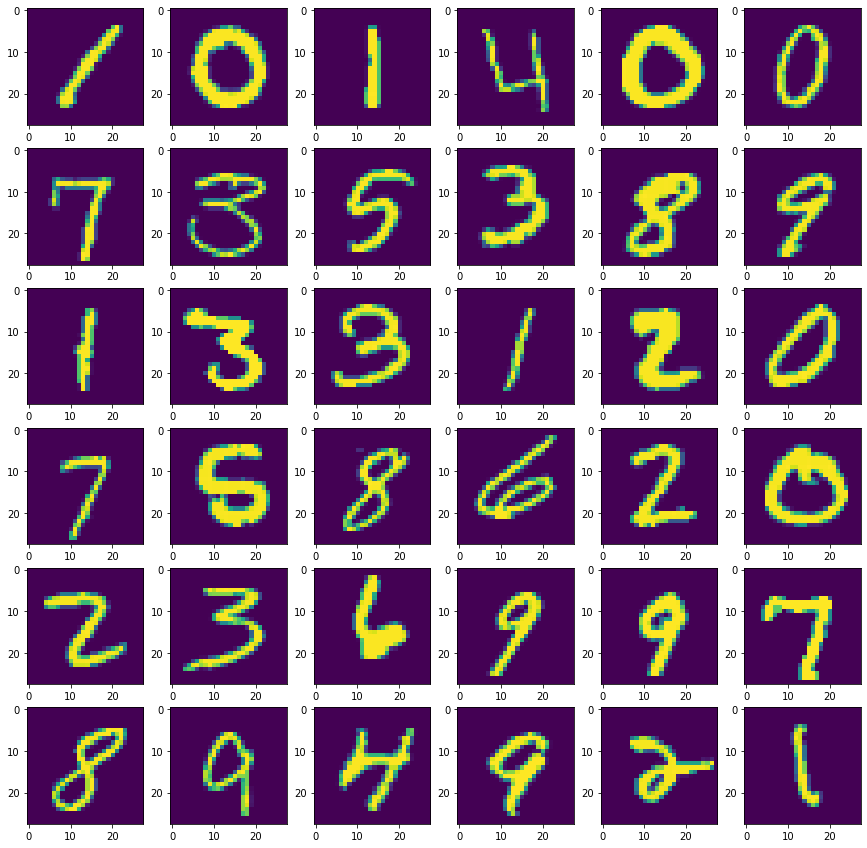

In [14]:

fig = plt.figure(figsize=(15,15))

for i in range(36):
    ax = fig.add_subplot(6,6,i+1)
    ax.imshow(X[i].reshape(28,28))
    #ax.set_title(class_names[y_train_full[i]])

plt.show()
    

In [15]:
# Obtener datos: ya está dividido en conjuntos de entrenamiento y prueba
# División entrenamiento prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [16]:
X_train.shape

(31500, 784)

In [17]:
# Reformar datos
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [18]:
# Paso 1: Definir nuestra estructura de red
# Guardar la forma de entrada
input_shape = X_train.shape[1:4]
input_shape

(28, 28, 1)

In [19]:
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

In [20]:
# Modelo secuencial
model = Sequential()

In [21]:
# Capa convolucional
model.add(Conv2D(filters = 8, # Cuantos filtros quieres usar
                 kernel_size = 3, # tamaño de cada filtro
                 input_shape = input_shape)) # ¿Cuál es la forma de tus características de entrada (definimos esto arriba)
# Pooling layer
model.add(MaxPooling2D(pool_size = 2)) # Tamaño de pooling
# Capa de aplanamiento
model.add(Flatten())
# Capa de salida
model.add(Dense(10, # Cuantas posibilidades de salida tenemos
                activation = 'softmax')) # ¿Qué función de activación estás usando?

In [22]:
# Paso 2: compilar
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [23]:
# Paso 3: ajustar nuestro modelo
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test), 
                    epochs=10)

Epoch 1/10
985/985 [==============================] - 11s 11ms/step - loss: 0.4196 - accuracy: 0.8834 - val_loss: 0.2749 - val_accuracy: 0.9200
Epoch 2/10
985/985 [==============================] - 11s 11ms/step - loss: 0.2382 - accuracy: 0.9316 - val_loss: 0.2309 - val_accuracy: 0.9355
Epoch 3/10
985/985 [==============================] - 12s 12ms/step - loss: 0.1899 - accuracy: 0.9460 - val_loss: 0.1859 - val_accuracy: 0.9461
Epoch 4/10
985/985 [==============================] - 11s 11ms/step - loss: 0.1530 - accuracy: 0.9569 - val_loss: 0.1553 - val_accuracy: 0.9566
Epoch 5/10
985/985 [==============================] - 11s 11ms/step - loss: 0.1262 - accuracy: 0.9643 - val_loss: 0.1397 - val_accuracy: 0.9592
Epoch 6/10
985/985 [==============================] - 11s 11ms/step - loss: 0.1083 - accuracy: 0.9692 - val_loss: 0.1164 - val_accuracy: 0.9665
Epoch 7/10
985/985 [==============================] - 11s 11ms/step - loss: 0.0950 - accuracy: 0.9726 - val_loss: 0.1117 - val_accuracy:

In [24]:
model.evaluate(X_test, y_test)

329/329 [==============================] - 2s 5ms/step - loss: 0.0943 - accuracy: 0.9718


[0.09432555735111237, 0.9718095064163208]

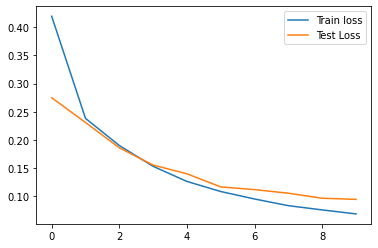

In [25]:
# Visualizar la pérdida
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

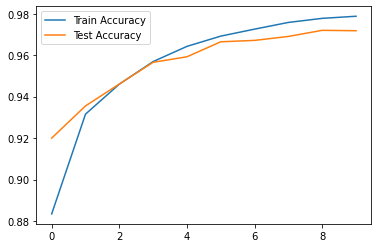

In [26]:
# Visualizar la precisión
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.legend();

In [27]:
filename = 'test.csv'    

df2 = CargaDatos(filename)

df2

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
class_names = ["0", "1", "2", "3", "4","5", "6", "7", "8", "9"] # 10 clases

In [29]:
X_full = df2.values /255 
X_full

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [30]:
X_full.shape

(28000, 784)

In [31]:
X_full = X_full.reshape(X_full.shape[0], 28, 28, 1)
X_full.shape

(28000, 28, 28, 1)

Clase Real: 0


Clase Real: 9


Clase Real: 9


Clase Real: 3


Clase Real: 7


Clase Real: 0


Clase Real: 3


Clase Real: 0


Clase Real: 3


Clase Real: 5


Clase Real: 7


Clase Real: 4


Clase Real: 0


Clase Real: 4


Clase Real: 3


Clase Real: 3


Clase Real: 1


Clase Real: 9


Clase Real: 0




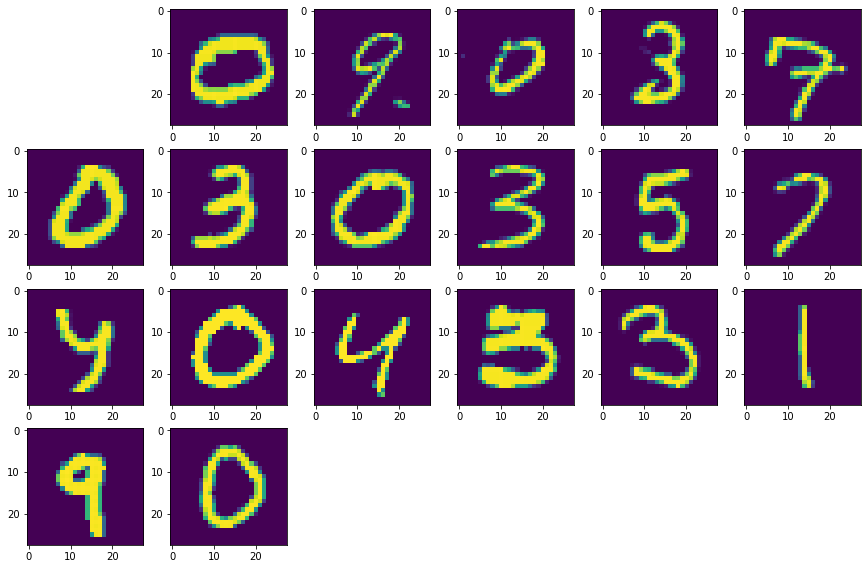

In [35]:
fig = plt.figure(figsize=(15,15))

for dato in range(1,20,1):
  
  ax = fig.add_subplot(6,6,dato+1)

  prediction = model.predict(X_full)
  classes_x = np.argmax(prediction,axis=1)
  #print("Predicción:", class_names[classes_x[dato]])
  ax.imshow(X_full[dato].reshape(28,28))
  print("Clase Real:",  class_names[classes_x[dato]])
  print("\n")



plt.show()